In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv('ipl_2023_dataset.csv')

In [3]:
csv

,Unnamed: 0,Player Name,Type,Price Cr,Team
0,0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings
...,...,...,...,...,...
563,563,Dhruv Patel,All-Rounder,NaN,Unsold
564,564,Jack Prestwidge,All-Rounder,NaN,Unsold
565,565,Aditya Sarvate,All-Rounder,NaN,Unsold
566,566,Sagar Solanki,All-Rounder,NaN,Unsold


In [4]:
csv.shape

(568, 5)

In [5]:
csv.columns

Index(['Unnamed: 0', 'Player Name', 'Type', 'Price Cr', 'Team'], dtype='object')

In [6]:
csv['Team'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Lucknow Super Giants', 'Mumbai Indians', 'Punjab Kings',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [7]:
csv.rename(columns={'Unnamed: 0': 'Player_ID'}, inplace=True)

In [8]:
csv[:20]

,Player_ID,Player Name,Type,Price Cr,Team
0,0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings
5,5,Ambati Rayudu,Batter,6.75,Chennai Super Kings
6,6,Ruturaj Gaikwad,Batter,6.00,Chennai Super Kings
7,7,Shivam Dube,All-Rounder,4.00,Chennai Super Kings
8,8,Mitchell Santner,All-Rounder,1.90,Chennai Super Kings
9,9,Rajvardhan Hangargekar,Bowler,1.50,Chennai Super Kings


## 1.How Many Player are there in each Team

In [9]:
pivot_table = pd.pivot_table(csv, index='Team', aggfunc='size')
pivot_table_df = pivot_table.to_frame(name='Total Players Count')
pivot_table_df

,Total Players Count
Team,
Chennai Super Kings,25
Delhi Capitals,25
Gujarat Titans,47
Lucknow Super Giants,25
Mumbai Indians,24
Punjab Kings,22
Rajasthan Royals,25
Royal Challengers Bangalore,25
Sunrisers Hyderabad,25


In [10]:
GT = csv[csv['Team'] == 'Gujarat Titans']['Player Name']
GT.to_frame()

,Player Name
50,Hardik Pandya
51,Rashid Khan
52,Rahul Tewatia
53,Shubman Gill
54,Mohammad Shami
55,Shivam Mavi
56,Josh Little
57,Yash Dayal
58,Sai Kishore
59,David Miller


## 2.Total Amount spent by each team in IPL'23 Auction

In [11]:
total_money_spent_by_team = csv.groupby('Team')['Price Cr'].sum().reset_index()
print("Total money spent by each team:")
total_money_spent_by_team

Total money spent by each team:


,Team,Price Cr
0,Chennai Super Kings,93.50
1,Delhi Capitals,90.55
2,Gujarat Titans,183.90
3,Lucknow Super Giants,91.45
4,Mumbai Indians,94.95
5,Punjab Kings,82.80
6,Rajasthan Royals,91.65
7,Royal Challengers Bangalore,93.25
8,Sunrisers Hyderabad,88.45
9,Unsold,0.00


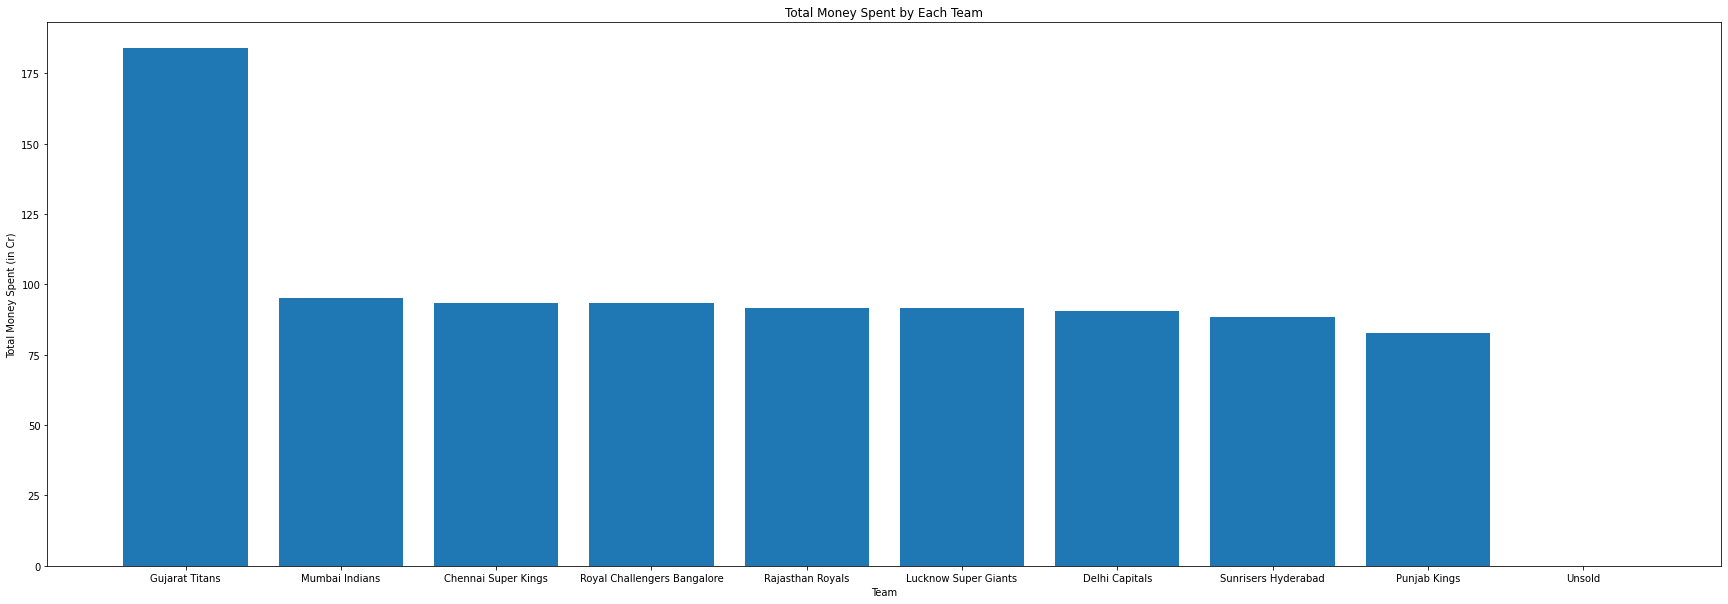

In [12]:
plt.figure(figsize=(30, 10))
total_money_spent_by_team = total_money_spent_by_team.sort_values(by='Price Cr', ascending=False)
plt.bar(total_money_spent_by_team['Team'], total_money_spent_by_team['Price Cr'])
plt.xlabel('Team')
plt.ylabel('Total Money Spent (in Cr)')
plt.title('Total Money Spent by Each Team')
plt.show()

## 3.Total Average Amount spent by each team in IPL'23 Auction 

In [13]:
average_price_by_team = csv.groupby('Team')['Price Cr'].mean().reset_index()
average_price_by_team.round(2)

,Team,Price Cr
0,Chennai Super Kings,3.74
1,Delhi Capitals,3.62
2,Gujarat Titans,3.91
3,Lucknow Super Giants,3.66
4,Mumbai Indians,3.96
5,Punjab Kings,3.76
6,Rajasthan Royals,3.67
7,Royal Challengers Bangalore,3.73
8,Sunrisers Hyderabad,3.54
9,Unsold,NaN


## 4.List of Squad in Royal Challengers Bangalore Team and their Role for '23 Auction

In [35]:
RCB_Players = csv[csv['Team'] == 'Royal Challengers Bangalore'][['Player Name', 'Price Cr', 'Type']]
RCB_Players

,Player Name,Price Cr,Type
168,Virat Kohli,15.00,Batter
169,Glenn Maxwell,11.00,All-Rounder
170,Harshal Patel,10.75,Bowler
171,Wanindu Hasaranga,10.75,All-Rounder
172,Josh Hazlewood,7.75,Bowler
173,Faf du Plessis,7.00,Batter
174,Mohammed Siraj,7.00,Bowler
175,Dinesh Karthik,5.50,Wicket-Keeper
176,Anuj Rawat,3.40,Wicket-Keeper
177,Will Jacks,3.20,Batter


## 5. List of All rounders in LSG Team for IPL 2023

In [15]:
lsg_allrounders = csv[(csv['Team'] == 'Lucknow Super Giants') & (csv['Type'] == 'All-Rounder')]

In [16]:
lsg_allrounders = lsg_allrounders[['Player Name', 'Price Cr']]
lsg_allrounders

,Player Name,Price Cr
100,Marcus Stoinis,10.00
101,Krunal Pandya,8.25
104,Deepak Hooda,5.75
106,Krishnappa Gowtham,0.90
107,Daniel Sams,0.75
112,Romario Shepherd,0.50
116,Karan Sharma,0.20
117,Yudhvir Singh,0.20
119,Prerak Mankad,0.20
120,Swapnil Singh,0.20


## 6. Highest Money Invested Team to buy player in IPL 2023 

In [17]:
total_investment_by_team = csv.groupby('Team')['Price Cr'].sum()
team_highest_investment = total_investment_by_team.idxmax()
highest_investment_amount = total_investment_by_team.max()

print("Team with the highest total investment:")
print("Team:", team_highest_investment)
print("Total Investment:", highest_investment_amount)

Team with the highest total investment:
Team: Gujarat Titans
Total Investment: 183.9


In [18]:
print(csv['Team'].unique())

['Chennai Super Kings' 'Delhi Capitals' 'Gujarat Titans'
 'Lucknow Super Giants' 'Mumbai Indians' 'Punjab Kings'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Sunrisers Hyderabad'
 'Unsold']


In [19]:
csv

,Player_ID,Player Name,Type,Price Cr,Team
0,0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings
...,...,...,...,...,...
563,563,Dhruv Patel,All-Rounder,NaN,Unsold
564,564,Jack Prestwidge,All-Rounder,NaN,Unsold
565,565,Aditya Sarvate,All-Rounder,NaN,Unsold
566,566,Sagar Solanki,All-Rounder,NaN,Unsold


 ## 7. Find the player with the highest price along with Role in the team

In [20]:
Expensive_Player = csv[csv['Price Cr'] == csv['Price Cr'].max()]
Expensive_Player

,Player_ID,Player Name,Type,Price Cr,Team
146,146,Sam Curran,All-Rounder,18.5,Punjab Kings


## 8. Who are the bowlers picked from the team Sunrisers Hyderabad in IPL 2023 Auction

In [21]:
SRH_bowlers = csv[(csv['Team']=='Sunrisers Hyderabad') & (csv['Type'] == 'Bowler')]
SRH_bowlers_count = SRH_bowlers['Player Name'].count()
print('Total Bowlers in SRH Team :',SRH_bowlers_count)
SRH_bowlers['Player Name'].to_frame()

Total Bowlers in SRH Team : 9


,Player Name
224,Bhuvneshwar Kumar
225,Marco Jansen
227,Umran Malik
228,T Natarajan
229,Kartik Tyagi
232,Adil Rashid
235,Akeal Hosein
236,Mayank Markande
237,Fazalhaq Farooqi


## 9. List team wise Total All-Rounders in IPL 2023 and find which team has highest number of all rounders

In [22]:
allrounders_count_by_team = csv[csv['Type'] == 'All-Rounder']['Team'].value_counts()
team_highest_allrounders = allrounders_count_by_team.index[1] 
print('Team with the highest number of All-Rounders:\n', team_highest_allrounders)
allrounders_count_by_team.iloc[1:].to_frame()

Team with the highest number of All-Rounders:
 Gujarat Titans


,count
Team,
Gujarat Titans,11
Lucknow Super Giants,10
Chennai Super Kings,9
Punjab Kings,7
Royal Challengers Bangalore,6
Sunrisers Hyderabad,6
Delhi Capitals,4
Mumbai Indians,4
Rajasthan Royals,4


In [23]:
allrounders_count_by_team.to_frame()[1:]

,count
Team,
Gujarat Titans,11
Lucknow Super Giants,10
Chennai Super Kings,9
Punjab Kings,7
Royal Challengers Bangalore,6
Sunrisers Hyderabad,6
Delhi Capitals,4
Mumbai Indians,4
Rajasthan Royals,4


## 10. List of Unsold Players Roles and count in IPL 2023

In [24]:
unsold_players = csv[csv['Team'] == 'Unsold']
total_unsold_players = len(unsold_players)
type_counts = unsold_players['Type'].value_counts()
print(f"Total number of players in the Unsold: {total_unsold_players}")
print("Count of each player type in the Unsold:")
type_counts.to_frame()

Total number of players in the Unsold: 325
Count of each player type in the Unsold:


,count
Type,
All-Rounder,126
Bowler,104
Batter,50
Wicket-Keeper,45


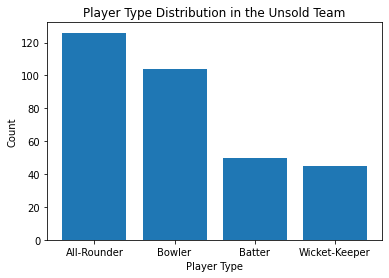

In [25]:
plt.bar(type_counts.index, type_counts)
plt.xlabel('Player Type')
plt.ylabel('Count')
plt.title('Player Type Distribution in the Unsold Team')
plt.show()